In [1]:
.libPaths()

[1] "C:/Program Files/R/R-3.5.1/library"

## Library installations
install.packages("ggplot2", repos = "http://cran.us.r-project.org")

install.packages("splm", repos = "http://cran.us.r-project.org") 

install.packages("foreign", repos = "http://cran.us.r-project.org")

install.packages("readstata13", repos = "http://cran.us.r-project.org")

install.packages("lubridate", repos = "http://cran.us.r-project.org")

install.packages("plm", repos = "http://cran.us.r-project.org")

install.packages("zoo", repos = "http://cran.us.r-project.org")

install.packages("rgdal", repos = "http://cran.us.r-project.org")

install.packages("tidyverse", repos = "http://cran.us.r-project.org")

install.packages("spdep", repos = "http://cran.us.r-project.org")

install.packages("plyr", repos = "http://cran.us.r-project.org")

install.packages("gstat", repos = "http://cran.us.r-project.org")

install.packages("GISTools", repos = "http://cran.us.r-project.org")

install.packages("ggmap", repos = "http://cran.us.r-project.org")

install.packages("rgdal", repos = "http://cran.us.r-project.org")

install.packages("knitr", repos = "http://cran.us.r-project.org")

install.packages("tufte", repos = "http://cran.us.r-project.org")

install.packages("geojsonio", repos = "http://cran.us.r-project.org")

install.packages("pacman", repos = "http://cran.us.r-project.org")

In [2]:
.libPaths()

[1] "C:/Program Files/R/R-3.5.1/library"

library(ggplot2)
library(splm)
library(foreign)
library(readstata13)
library(lubridate)
library(plm)
library(zoo)
library(rgdal)
#Layout
library(tufte)
#For pretty table
library(knitr)
#Spatial Data management
library(rgdal)
#Pretty graphics
library(ggplot2)
#Pretty maps
library(ggmap)
#Various GIS utilities
library(GISTools)
#For all your interpolation needs
library(gstat)
#For data manipulation
library(plyr)
#Spatial regression
library(spdep)

In [3]:
pacman::p_load(rgdal, plm, splm, spdep, dplyr, zoo)

In [31]:
#Filepaths
work <- "D:"
laptop <- "C:\\Users\\jerem"
origin = work

In [5]:
# input Stata file
#mystata.df <- read.dta13("C:\\Users\\jerem\\Box Sync\\Policy Evaluation\\working_data\\analytical_file_panel_qt.dta")

In [59]:
# Input shapefile
myshp  <-readOGR(dsn="D:\\Box Sync\\Policy Evaluation\\working_data\\analytical_panel_shapefile\\analytical_panel_qt_shapefile_crosssec_thiessen_polygons_clipped_manhattan.shp",layer="analytical_panel_qt_shapefile_crosssec_thiessen_polygons_clipped_manhattan")


OGR data source with driver: ESRI Shapefile 
Source: "D:\Box Sync\Policy Evaluation\working_data\analytical_panel_shapefile\analytical_panel_qt_shapefile_thiessen_polygons_clipped_manhattan.shp", layer: "analytical_panel_qt_shapefile_thiessen_polygons_clipped_manhattan"
with 70050 features
It has 63 fields


In [42]:
names(myshp)

[1] "collision_" "personsinj" "pedestrian" "cyclistinj" "motoristin"
 [6] "bronx"      "brooklyn"   "manhattan"  "queens"     "statenisla"
[11] "distance_t" "distance_1" "distance_2" "distance_3" "distance_4"
[16] "distance_5" "flag_left_" "flag_lef_1" "flag_LPIS_" "flag_LPIS" 
[21] "bike_route" "bike_rou_1" "flag_senio" "flag_prior" "flag_schoo"
[26] "flag_stree" "quarter"    "year"       "intersecti" "y"         
[31] "x"          "DUP_IDS"    "collisio_1" "personsi_1" "pedestri_1"
[36] "cyclisti_1" "motorist_1" "bronx_left" "brooklyn_l" "manhattan_"
[41] "queens_lef" "statenis_1" "distance_6" "distance_7" "distance_8"
[46] "distance_9" "distance10" "distance11" "flag_lef_2" "flag_lef_3"
[51] "flag_LPI_1" "flag_LPI_2" "bike_rou_2" "bike_rou_3" "flag_sen_1"
[56] "flag_pri_1" "flag_sch_1" "flag_str_1" "quarter_le" "year_left" 
[61] "intersec_1" "y_left"     "x_left"

In [43]:
summary(myshp)

Object of class SpatialPolygonsDataFrame
Coordinates:
        min       max
x -74.01960 -73.90705
y  40.69931  40.87833
Is projected: FALSE 
proj4string :
[+proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0]
Data attributes:
   collision_       personsinj        pedestrian        cyclistinj     
 Min.   : 0.000   Min.   : 0.0000   Min.   : 0.0000   Min.   :0.00000  
 1st Qu.: 0.000   1st Qu.: 0.0000   1st Qu.: 0.0000   1st Qu.:0.00000  
 Median : 2.000   Median : 0.0000   Median : 0.0000   Median :0.00000  
 Mean   : 2.505   Mean   : 0.4481   Mean   : 0.1589   Mean   :0.07459  
 3rd Qu.: 3.000   3rd Qu.: 1.0000   3rd Qu.: 0.0000   3rd Qu.:0.00000  
 Max.   :49.000   Max.   :31.0000   Max.   :29.0000   Max.   :5.00000  
   motoristin          bronx             brooklyn   manhattan          queens 
 Min.   : 0.0000   Min.   :0.000000   Min.   :0   Min.   :0.0000   Min.   :0  
 1st Qu.: 0.0000   1st Qu.:0.000000   1st Qu.:0   1st Qu.:1.0000   1st Qu.:0  
 Median : 0.0000   Me

In [44]:
names(myshp)

[1] "collision_" "personsinj" "pedestrian" "cyclistinj" "motoristin"
 [6] "bronx"      "brooklyn"   "manhattan"  "queens"     "statenisla"
[11] "distance_t" "distance_1" "distance_2" "distance_3" "distance_4"
[16] "distance_5" "flag_left_" "flag_lef_1" "flag_LPIS_" "flag_LPIS" 
[21] "bike_route" "bike_rou_1" "flag_senio" "flag_prior" "flag_schoo"
[26] "flag_stree" "quarter"    "year"       "intersecti" "y"         
[31] "x"          "DUP_IDS"    "collisio_1" "personsi_1" "pedestri_1"
[36] "cyclisti_1" "motorist_1" "bronx_left" "brooklyn_l" "manhattan_"
[41] "queens_lef" "statenis_1" "distance_6" "distance_7" "distance_8"
[46] "distance_9" "distance10" "distance11" "flag_lef_2" "flag_lef_3"
[51] "flag_LPI_1" "flag_LPI_2" "bike_rou_2" "bike_rou_3" "flag_sen_1"
[56] "flag_pri_1" "flag_sch_1" "flag_str_1" "quarter_le" "year_left" 
[61] "intersec_1" "y_left"     "x_left"

In [45]:
names(myshp) <- c("collision_count","personsinjured","pedestriansinjured","cyclistinjured","motoristinjured","bronx","brooklyn","manhattan","queens","statenisland","distance_to_LPIS","distance_to_Street","distance_to_Sch","distance_to_LTC","distance_to_bikeroute","distance_to_truckroute","flag_left_turn_ever","flag_left_turn","flag_LPIS_ever","flag_LPIS","bike_route_tv","bike_route_ever", "flag_seniors","flag_priorityinters","flag_school","flag_street_improv", "quarter","year","intersection_id","y","x")

In [51]:
# drop the last column (NA) in the dataset
myshp@data <- myshp@data[,-32]

In [52]:
names(myshp)

[1] "collision_count"        "personsinjured"         "pedestriansinjured"    
 [4] "cyclistinjured"         "motoristinjured"        "bronx"                 
 [7] "brooklyn"               "manhattan"              "queens"                
[10] "statenisland"           "distance_to_LPIS"       "distance_to_Street"    
[13] "distance_to_Sch"        "distance_to_LTC"        "distance_to_bikeroute" 
[16] "distance_to_truckroute" "flag_left_turn_ever"    "flag_left_turn"        
[19] "flag_LPIS_ever"         "flag_LPIS"              "bike_route_tv"         
[22] "bike_route_ever"        "flag_seniors"           "flag_priorityinters"   
[25] "flag_school"            "flag_street_improv"     "quarter"               
[28] "year"                   "intersection_id"        "y"                     
[31] "x"                      "NA.2"                   "NA.3"                  
[34] "NA.4"                   "NA.5"                   "NA.6"                  
[37] "NA.7"                   "NA.8"                   "NA.9"                  
[40] "NA.10"                  "NA.11"                  "NA.12"                 
[43] "NA.13"                  "NA.14"                  "NA.15"                 
[46] "NA.16"                  "NA.17"                  "NA.18"                 
[49] "NA.19"                  "NA.20"                  "NA.21"                 
[52] "NA.22"                  "NA.23"                  "NA.24"                 
[55] "NA.25"                  "NA.26"                  "NA.27"                 
[58] "NA.28"                  "NA.29"                  "NA.30"

In [53]:
# Create time variable in mydata
myshp@data$x <- paste(as.character(myshp@data$year) , as.character(myshp@data$quarter))
myshp@data$quarter_year <- as.yearqtr(format(myshp@data$x), "%Y%q")

In [54]:
# Check that quarter_year is correctly formatted
table(myshp@data$quarter_year)


2012 Q3 2012 Q4 2013 Q1 2013 Q2 2013 Q3 2013 Q4 2014 Q1 2014 Q2 2014 Q3 2014 Q4 
   2802    2802    2802    2802    2802    2802    2802    2802    2802    2802 
2015 Q1 2015 Q2 2015 Q3 2015 Q4 2016 Q1 2016 Q2 2016 Q3 2016 Q4 2017 Q1 2017 Q2 
   2802    2802    2802    2802    2802    2802    2802    2802    2802    2802 
2017 Q3 2017 Q4 2018 Q1 2018 Q2 2018 Q3 
   2802    2802    2802    2802    2802 

In [56]:
typeof(myshp@data$quarter_year)

[1] "double"

In [57]:
# Sort my panel by intersection first, then time
myshp@data <- myshp@data[order(myshp@data$quarter_year,myshp@data$intersection_id),]

In [58]:
head(myshp@data)


,collision_count,personsinjured,pedestriansinjured,cyclistinjured,motoristinjured,bronx,brooklyn,manhattan,queens,statenisland,...,NA.22,NA.23,NA.24,NA.25,NA.26,NA.27,NA.28,NA.29,NA.30,quarter_year
12,6,1,1,0,0,0,0,1,0,0,...,1,1,0,0,3,2012,1,199793.6,986336.1,2012 Q3
37,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,3,2012,2,202206.2,982769.3,2012 Q3
62,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,3,2012,3,201790.1,982805.6,2012 Q3
87,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,3,2012,4,201530.0,982812.3,2012 Q3
112,5,1,0,0,1,0,0,1,0,0,...,0,0,0,0,3,2012,5,201226.1,982816.4,2012 Q3
137,7,1,1,0,0,0,0,1,0,0,...,1,0,0,0,3,2012,6,200696.0,984441.4,2012 Q3


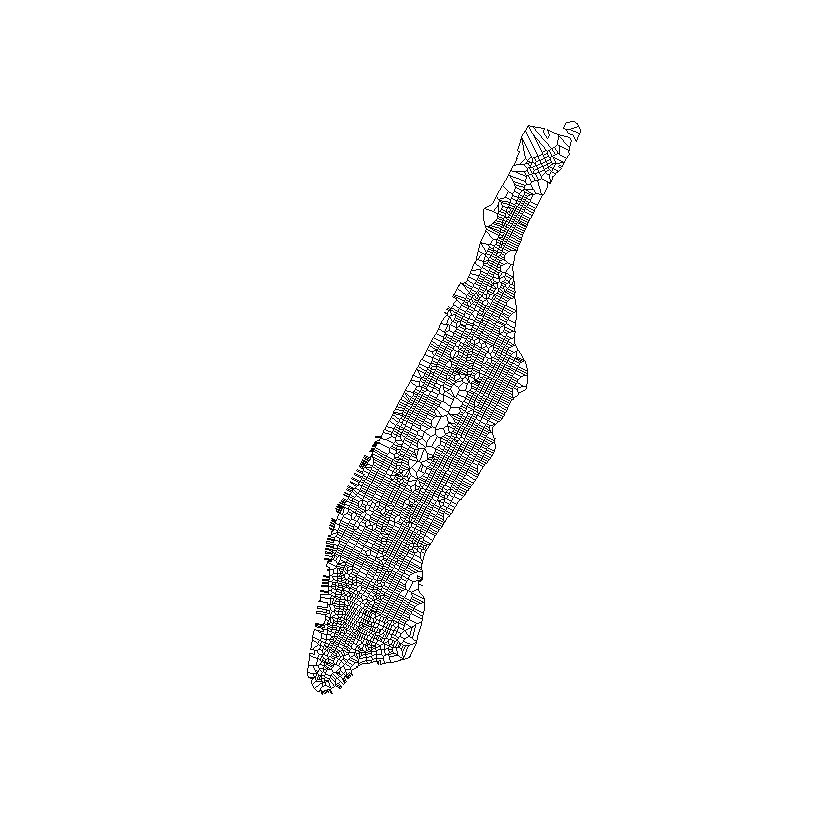

In [26]:
plot(myshp)

In [27]:
# Set new df from myshp so that I can run plm and splm later
mydata <- as.data.frame(myshp@data)

In [28]:
# Check that they are the same in both datasets
summary(mydata$flag_LPIS )
summary(myshp@data$flag_LPIS )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

In [20]:
## reorder variables
# Move intersection id and year_quarter to first column of dataframe
# %>% is a pipe operator, it is used to execute several commands in one command

mydata <- dplyr::select(mydata,intersection_id, quarter_year, everything())

In [29]:
head(mydata)

,collision_count,personsinjured,pedestriansinjured,cyclistinjured,motoristinjured,bronx,brooklyn,manhattan,queens,statenisland,...,bike_route_ever,flag_seniors,flag_priorityinters,flag_school,flag_street_improv,quarter,year,intersection_id,y,x
0,6,1,1,0,0,0,0,1,0,0,...,1,1,1,0,0,3,2012,1,199793.6,986336.1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,3,2012,2,202206.2,982769.3
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,3,2012,3,201790.1,982805.6
3,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,3,2012,4,201530.0,982812.3
4,5,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,3,2012,5,201226.1,982816.4
5,7,1,1,0,0,0,0,1,0,0,...,0,1,0,0,0,3,2012,6,200696.0,984441.4


In [22]:
model = collision_count~flag_LPIS+factor(quarter_year)+bike_route_tv+flag_street_improv+flag_left_turn+flag_school*factor(quarter_year)+flag_priorityinters*factor(quarter_year)+flag_seniors*factor(quarter_year)

In [23]:
## Linear regression 
ols <- lm(model,data=mydata)
summary(ols)


Call:
lm(formula = model, data = mydata)

Residuals:
   Min     1Q Median     3Q    Max 
-7.533 -1.459 -0.621  0.587 74.299 

Coefficients:
                                                  Estimate Std. Error t value
(Intercept)                                      1.5974319  0.0244596  65.309
flag_LPIS                                        0.4465668  0.0189421  23.575
factor(quarter_year)2012 Q4                     -0.0295871  0.0344891  -0.858
factor(quarter_year)2013 Q1                     -0.1461667  0.0344891  -4.238
factor(quarter_year)2013 Q2                      0.0913766  0.0344892   2.649
factor(quarter_year)2013 Q3                     -0.0166805  0.0344894  -0.484
factor(quarter_year)2013 Q4                      0.0133645  0.0344897   0.387
factor(quarter_year)2014 Q1                     -0.1465094  0.0344897  -4.248
factor(quarter_year)2014 Q2                      0.0186163  0.0344901   0.540
factor(quarter_year)2014 Q3                     -0.0151778  0.0344906  -0.440
f

In [24]:
# Fixed effects Linear panel regression
fe <- plm(model, data = mydata, index = c("intersection_id","quarter_year"), model = "within")
summary(fe)

Oneway (individual) effect Within Model

Call:
plm(formula = model, data = mydata, model = "within", index = c("intersection_id", 
    "quarter_year"))

Balanced Panel: n = 12987, T = 25, N = 324675

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-15.00110  -0.74753  -0.13651   0.53592  61.24352 

Coefficients:
                                                   Estimate  Std. Error
flag_LPIS                                       -0.17760243  0.01511721
factor(quarter_year)2012 Q4                     -0.02722383  0.02158607
factor(quarter_year)2013 Q1                     -0.14379965  0.02158607
factor(quarter_year)2013 Q2                      0.09527770  0.02158644
factor(quarter_year)2013 Q3                     -0.00999119  0.02158793
factor(quarter_year)2013 Q4                      0.02250200  0.02158963
factor(quarter_year)2014 Q1                     -0.13722050  0.02158963
factor(quarter_year)2014 Q2                      0.03074863  0.02159241
factor(quarter_year)2014

In [25]:
pFtest(fe, ols) 


	F test for individual effects

data:  model
F = 39.821, df1 = 12983, df2 = 311590, p-value < 2.2e-16
alternative hypothesis: significant effects


In [26]:
# Random effects Linear panel regression
re <- plm(model, data = mydata, index = c("intersection_id","quarter_year"), model = "random")
summary(re)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = model, data = mydata, model = "random", index = c("intersection_id", 
    "quarter_year"))

Balanced Panel: n = 12987, T = 25, N = 324675

Effects:
                var std.dev share
idiosyncratic 2.301   1.517 0.397
individual    3.496   1.870 0.603
theta: 0.8398

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-12.74084  -0.80304  -0.26802   0.51148  63.35540 

Coefficients:
                                                  Estimate Std. Error  t-value
(Intercept)                                      1.6555428  0.0245007  67.5712
flag_LPIS                                       -0.1541534  0.0150074 -10.2718
factor(quarter_year)2012 Q4                     -0.0276787  0.0216032  -1.2812
factor(quarter_year)2013 Q1                     -0.1442547  0.0216032  -6.6775
factor(quarter_year)2013 Q2                      0.0945363  0.0216035   4.3760
factor(quarter_year)2013 Q3   

In [27]:
# Hausman test
phtest(fe, re)


	Hausman Test

data:  model
chisq = 578.75, df = 100, p-value < 2.2e-16
alternative hypothesis: one model is inconsistent


Hausman test is significant. Use fixed effects.

In [28]:
#Create cross section of panel data
subset.myshp <- myshp[ which(myshp$quarter_year=='2012 Q3'), ]

In [29]:
table(subset.myshp@data$quarter_year)


2012 Q3 
  12987 

In [30]:
summary(subset.myshp)

Object of class SpatialPolygonsDataFrame
Coordinates:
       min       max
x 911158.3 1070171.2
y 119490.9  274784.9
Is projected: TRUE 
proj4string :
[+proj=lcc +lat_1=41.03333333333333 +lat_2=40.66666666666666
+lat_0=40.16666666666666 +lon_0=-74 +x_0=300000.0000000001 +y_0=0
+datum=NAD83 +units=us-ft +no_defs +ellps=GRS80 +towgs84=0,0,0]
Data attributes:
 collision_count  personsinjured    pedestriansinjured cyclistinjured   
 Min.   : 0.000   Min.   : 0.0000   Min.   :0.000      Min.   :0.00000  
 1st Qu.: 0.000   1st Qu.: 0.0000   1st Qu.:0.000      1st Qu.:0.00000  
 Median : 1.000   Median : 0.0000   Median :0.000      Median :0.00000  
 Mean   : 1.845   Mean   : 0.5269   Mean   :0.124      Mean   :0.06406  
 3rd Qu.: 3.000   3rd Qu.: 1.0000   3rd Qu.:0.000      3rd Qu.:0.00000  
 Max.   :55.000   Max.   :19.0000   Max.   :4.000      Max.   :3.00000  
 motoristinjured       bronx           brooklyn        manhattan     
 Min.   : 0.0000   Min.   :0.0000   Min.   :0.0000   Min.   

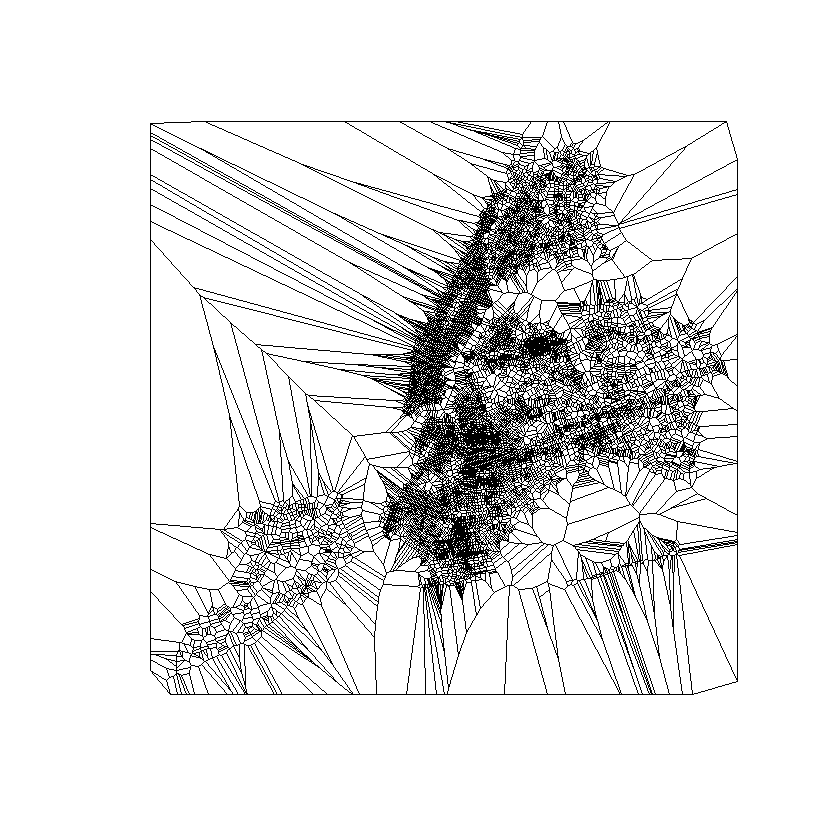

In [31]:
plot(subset.myshp)

In [32]:
# Calculate contiguity queen neighbors
myshp_nb <- poly2nb(subset.myshp, queen = TRUE)

In [33]:
summary(myshp_nb)

Neighbour list object:
Number of regions: 12987 
Number of nonzero links: 77720 
Percentage nonzero weights: 0.04608028 
Average number of links: 5.984446 
Link number distribution:

   2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17 
   3   66 1470 3544 4144 2278  825  359  160   69   30   15   12    7    2    1 
  19   20 
   1    1 
3 least connected regions:
2769 10139 12801 with 2 links
1 most connected region:
5579 with 20 links


In [34]:
 myshp_nb_w <- nb2listw(myshp_nb,glist=NULL,style="W",zero.policy=FALSE) 

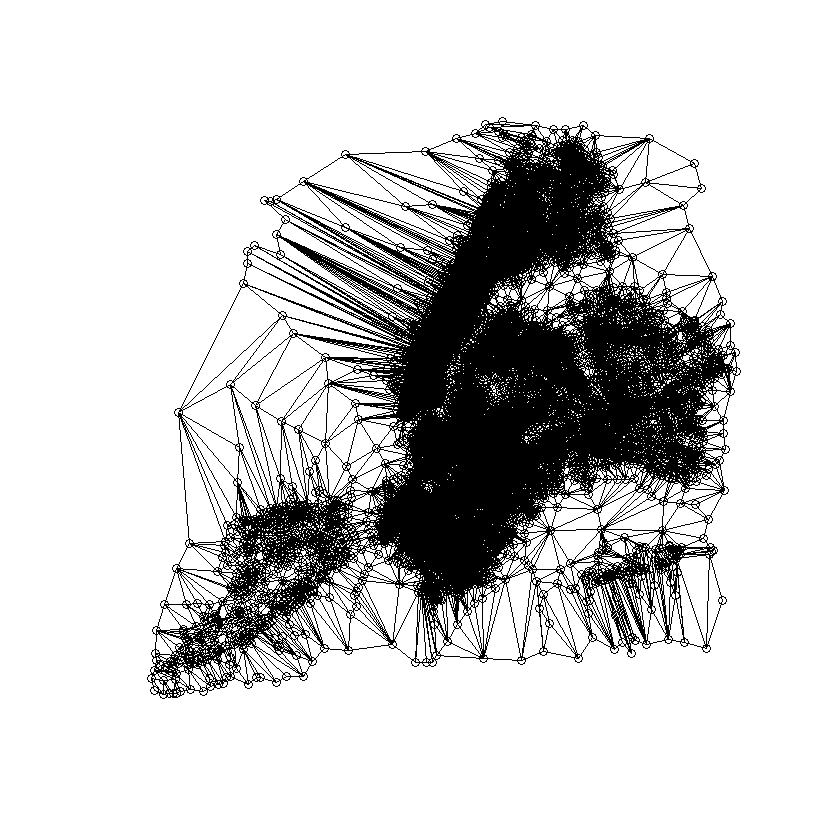

In [35]:
plot(myshp_nb_w,coordinates(subset.myshp))


In [36]:
model2 = collision_count~flag_LPIS
model = collision_count~flag_LPIS+factor(quarter_year)+bike_route_tv+flag_street_improv+flag_left_turn+flag_school*factor(quarter_year)+flag_priorityinters*factor(quarter_year)+flag_seniors*factor(quarter_year)

In [37]:
fespaterr <- spml(model2, data = mydata, listw = myshp_nb_w, index = c("intersection_id","quarter_year"),
                   model="within", spatial.error="b", lag = FALSE)
summary(fespaterr)

Spatial panel fixed effects error model
 

Call:
spml(formula = model2, data = mydata, index = c("intersection_id", 
    "quarter_year"), listw = myshp_nb_w, model = "within", lag = FALSE, 
    spatial.error = "b")

Residuals:
   Min. 1st Qu.  Median 3rd Qu.    Max. 
-17.360  -0.760  -0.040   0.520  61.572 

Spatial error parameter:
     Estimate Std. Error t-value  Pr(>|t|)    
rho 0.2046916  0.0027504  74.424 < 2.2e-16 ***

Coefficients:
           Estimate Std. Error t-value  Pr(>|t|)    
flag_LPIS -0.411646   0.014458 -28.471 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [ ]:
impacts(fespaterr,listw = myshp_nb_w, time = 25)

In [ ]:
fespatlag <- spml(model2, data = mydata, listw = myshp_nb_w, index = c("intersection_id","quarter_year"),
                   model="within", lag = TRUE)
summary(fespatlag)

In [ ]:
#The alternative hypothesis is one of no random regional effects
bsktest(x = model2, data = mydata, index = c("intersection_id","quarter_year"), listw = myshp_nb_w, test = "LM1")

In [ ]:
#The alternative hypothesis is one of no random regional effects
bsktest(x = model2, data = mydata, index = c("intersection_id","quarter_year"), listw = myshp_nb_w,test = "LM2")

In [ ]:
#check for spatial correlation in the errors of a model that possibly incorporates random effects
bsktest(x = model2, data = mydata, index = c("intersection_id","quarter_year"), listw =myshp_nb_w, test = "CLMlambda")

#spatial hausman 
sphtest(x = model2, data = mydata, listw = myshp_nb_w, index = c("intersection_id","quarter_year"), 
        spatial.model = "error", method = "GM")

mod1 <- spgm(formula = fm, data = mydata, index = c("intersection_id","quarter_year"), listw = myshp_nb_w, lag = TRUE, moments = "fullweights", model = "random", spatial.error = TRUE)
mod2 <- spgm(formula = fm, data = mydata, index = c("intersection_id","quarter_year"), listw = myshp_nb_w, lag = TRUE, model = "within", spatial.error = TRUE)
test2 <- sphtest(x = mod1, x2 = mod2)
test2

In [ ]:
memory.limit()